# OpenCV 中的轮廓
## 17.1 初识轮廓
## 目标
- 理解什么是轮廓
- 学习找轮廓，绘制轮廓等
- 函数： cv2.findContours()， cv2.drawContours()  

### 17.1.1 什么是轮廓
轮廓可以简单认为成将连续的点（连着边界）连在一起的曲线，具有相同
的颜色或者灰度。轮廓在形状分析和物体的检测和识别中很有用。
- 为了更加准确，要使用二值化图像。在寻找轮廓之前，要进行阈值化处理或者 Canny 边界检测。
- 查找轮廓的函数会修改原始图像。如果你在找到轮廓之后还想使用原始图像的话，你应该将原始图像存储到其他变量中。
- 在 OpenCV 中，查找轮廓就像在黑色背景中超白色物体。你应该记住，要找的物体应该是白色而背景应该是黑色。  

让我们看看如何在一个二值图像中查找轮廓：  
函数 contours,hierarchy = cv2.findContours(image,mode,method[,contours[,hierarchy[,offset]]])   
#### <font color=blue>有三个参数：  </font>
   - 第一个是输入图像，8位通道图像，所有非0值被处理为1，所有0值保持不变，也就是灰度图像会被自动处理为二值图像 
   - 第二个是轮廓检索模式:
        - cv2.RETR_EXTERNAL:只检测外轮廓
        - cv2.RETR_LIST:对检测到的轮廓不建立等级关系
        - cv2.RETR_CCOMP:检索轮廓并将他们分成两级层次结构
        - cv2.RETR_TREE:建立一个树结构
   - 第三个是轮廓近似方法，决定着如何表达轮廓
       - cv2.CHAIN_APPROX_NONE:存储所有轮廓点，相邻两个点的像素位置差不超过1，即max(abs(x1-x2),abs(y2-y1)==1)
       - cv2.CHAIN_APPROX_SIMPLE:压缩水平方向、垂直方向、对角线方向的元素，只保留该方向的终点坐标
       - CHAIN_APPROX_TC89_L1:Teh-Chin chain近似算法
       - CHAIN_APPROX_TC89_KCOS:Teh-Chin chain近似算法  
       
#### <font color=blue>返回值有两个:</font>  
   - 第一个是轮廓:是一个 Python列表，其中存储这图像中的所有轮廓。每一个轮廓都是一个 Numpy 数组，包含对象边界点（x,y）的坐标。
   - 第二个是（轮廓的）层析结构  


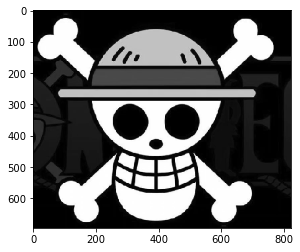

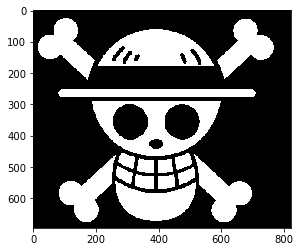

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# 我们 image要求是8位单通道二值图像，所以一般情况下，都是将图像处理为二值图像后，
# 再作为参数使用，故先将图像转换为灰度图像
img = cv2.imread('contours_test.png')
#img = cv2.imread('contour_approx.png')

imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imageRGB = cv2.cvtColor(imgGray,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

# 灰度图像转化为二值图像，自己设置合适的阈值
ret,thresh = cv2.threshold(imgGray,127,255,0)
imageRGB = cv2.cvtColor(thresh,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

# 获取轮廓
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


### 返回值contours：

In [3]:
# 查看其中的额一个点
print(type(contours[0]))
print(contours[0][0][0][0])

# 查看轮廓的个数
print(len(contours))

# 查看轮廓中点的个数
print(len(contours[10]))

<class 'numpy.ndarray'>
264
24
91


### 返回值hierarchy：  
返回轮廓之间的层次关系![](hierarchy.png)
如上图  
hierarchy1:里面的轮廓由0，1，2  
轮廓2里面又有轮廓，故形成新的层  
hierarchy2:2自己是该曾中的第一个子类（child）,记为2a，同样还有3,3又构成了一个层  
hierarchy2:第一个子类为3a,接下来为4和5

一个轮廓再另外一个轮廓的内部，我们称外部轮廓为父轮廓，内部轮廓为子轮廓，如2为父轮廓，2a，3为子轮廓  
每个轮廓contours[i]对应4个元素来说明其轮廓的层次关系[Next,Previous,First_Child,Parent]（都存的是索引编号）  
如果上述参数所对应的关系为空，也就是没有对应关系，则将参数所对应的值设为-1

In [4]:
print(hierarchy)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [15 10 12 -1]
  [13 -1 -1 11]
  [14 12 -1 11]
  [-1 13 -1 11]
  [16 11 -1 -1]
  [22 15 17 -1]
  [18 -1 -1 16]
  [19 17 -1 16]
  [20 18 -1 16]
  [21 19 -1 16]
  [-1 20 -1 16]
  [23 16 -1 -1]
  [-1 22 -1 -1]]]


### 17.1.2 怎样绘制轮廓
函数 image = cv2.drawContours(image,contours,contourldx,color[,thickness[,lineType[,hierarchy[,maxLevel[,offset]]]]]) 可以被用来绘制轮廓。它可以根据你提供的边界点绘制任何形状。  
- 第一个参数是原始图像    
- 第二个参数是轮廓，一个 Python列表(list)。    
- 第三个参数是轮廓的索引（在绘制独立轮廓是很有用，当设置为-1时绘制所有轮廓）。    
- 第四个参数是轮廓的颜色（BGR格式）    
- 第五个可选参数是厚度，-1表示要绘制失心轮廓  
- 第六个可选参数是线形  
- 第七个可选参数是层次信息
- 第八个可选参数是轮廓层次的深度
- 第九个参数是偏移参数


在一幅图像上绘制所有的轮廓:

<font color=blue size=4>**画出所有轮廓**</font>

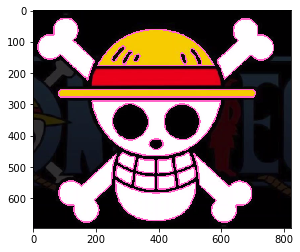

In [5]:
all_contours = cv2.drawContours(img,contours,-1,(200,100,255),3)
imageRGB = cv2.cvtColor(all_contours,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

<font color=blue size=4>**画出其中一个轮廓(常用)**</font>

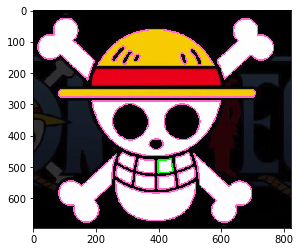

In [6]:
single_contours = cv2.drawContours(img,contours,5,(0,255,0),3)
imageRGB = cv2.cvtColor(single_contours,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

<font color=blue size=4>**还有一种方法画出其中一个轮廓**</font>

<class 'numpy.ndarray'>
<class 'list'>


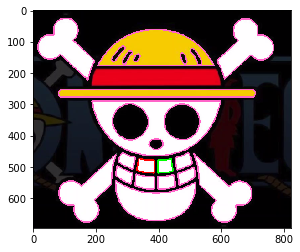

In [7]:
cnt = contours[6]
print(type(cnt))
print(type([cnt]))
a = cv2.drawContours(img,[cnt],0,(0,0,255),3) # cnt必须加[]，成为list类型
imageRGB = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

## 练习  
使用循环画出每一个轮廓

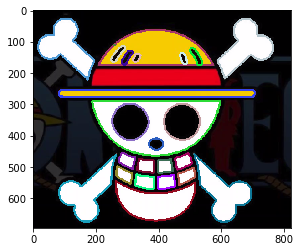

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import pylab

# 读取灰度图像
img = cv2.imread('contours_test.png',1)
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 灰度图像转化为二值图像，自己设置合适的阈值
ret,thresh = cv2.threshold(imgGray,180,255,0)

# 获取轮廓
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    B = random.randint(1,255)
    G = random.randint(1,255)
    R = random.randint(1,255)
    cnt = contours[i]
    a = cv2.drawContours(img,[cnt],0,(B,G,R),5)
imageRGB = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

## 17.2 轮廓特征
## 目标
- 查找轮廓的不同特征，例如面积，周长，重心，边界框等。
- 你会学到很多轮廓相关函数
  
### 17.2.1 矩
图像的矩可以帮助我们计算图像的质心，面积等。详细信息请查看维基百科[Image Moments](http://en.wikipedia.org/wiki/Image_moment)。  
空间矩：
    对于连续函数，其p+q阶矩为：$$M_{pq} = \int ^{\infty}_{-\infty}\int ^{\infty}_{-\infty}x^py^qf(x,y) {\rm d}x {\rm d}y$$
    对于图像 处理，为非连续函数：
    $$M_{ij}= \sum_x\sum_yx^iy^jI(x,y)$$
对于二值图像，I(x,y)的值为0或1  

函数 retval = cv2.moments(array[,binaryImage]) 会将计算得到的矩以一个字典的形式返回。如下：
- array:可以时点集，也可以时灰度图像或者二值图像，当array是点集时，函数会把这些点当作轮廓中的定点，把整个点集当作一条轮廓
- binaryImage:该参数为True时，array内所有的非零值都被处理为1，该参数仅在参数array为图像时有效
- retval:矩特征

读出一张图像，注意一定要以彩色格式读出，然后转化为灰度图像，否则最后画轮廓会有困难

In [9]:
import cv2
import numpy as np
img = cv2.imread('contours_test.png',0)

ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
M

{'m00': 19944.0,
 'm10': 7789103.0,
 'm01': 12232905.833333332,
 'm20': 3134326706.333333,
 'm11': 4778760394.166666,
 'm02': 7518834800.833333,
 'm30': 1296230307029.3,
 'm21': 1922129874679.25,
 'm12': 2937915463290.683,
 'm03': 4630959928251.25,
 'mu20': 92302762.05891466,
 'mu11': 1215091.0612630844,
 'mu02': 15626561.402894974,
 'mu30': 25684435.846435547,
 'mu21': -1298343749.279602,
 'mu12': -46173930.43754864,
 'mu03': 17559455.393554688,
 'nu20': 0.23205459155197994,
 'nu11': 0.0030548106430433116,
 'nu02': 0.03928609765107788,
 'nu30': 0.00045723489499890126,
 'nu21': -0.023113144140042473,
 'nu12': -0.0008219893308744434,
 'nu03': 0.00031259381327716}

根据这些矩的值，我们可以计算出对象的<font size=4>**重心(Centroid)**</font>：
$$C_x = \frac{M_{10}}{M_{00}}， C_y = \frac{M_{01}}{M_{00}} $$
更高阶的矩反应的特征如下：  
- 0阶矩($M_{00}$)：目标区域的质量
- 1阶矩($M_{01},M_{10}$)：目标区域的质心
- 2阶矩($M_{02},M{20},M_{11}$)：旋转半径
- 3阶矩($M_{03},M_{30},M_{12},M_{21}$):目标的方位和斜度

In [10]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
cx,cy

(390, 613)

In [11]:
ctd = np.array([[[cx,cy]]]) # 将质心坐标存储为一个点
ctd

array([[[390, 613]]])

**平移不变性(Translation invariants)**
为了构造平移不变性，我们将x,y值减去均值
$$\mu_{pq} = \sum_x\sum_y(x-\overline{x})^p(y-\overline{y})^qf(x,y)$$
其中:
$$\{\overline{x},\overline{y}\} = \lbrace\frac{M_{10}}{M_{00}}， \frac{M_{01}}{M_{00}}\rbrace$$

#### 尺度不变性(Scale invariants)
归一化中心矩具有尺度不变性
$$\eta_{ij}=\frac{\mu_{ij}}{\mu_{00}^{(1+\frac{i+j}{2})}}$$

#### 旋转不变性（Rotation invariants）
Hu矩是归一化中心矩的线性组合  
Hu矩在图像旋转、缩放、平移等操作后，仍然能够保持矩的不变性  
所以经常会使用Hu矩来识别图像的特征  
Hu矩在轮廓旋转缩放平移等操作后，仍能够保持不变的特性  
构造旋转不变性(h1,h2,....,h7)
![](Hu矩.png)

#### Hu矩
hu = cv2.HuMoments()
- hu:返回Hu矩
- m:是有cv2.moments()计算得到的矩特征值

**形状匹配(Match Shapes)**  
我们可以通过Hu矩来判断两个对象的一致性  
为了比较直观的比较Hu矩的矩值，可以使用cv2.mathShapes()，该函数会计算好Hu值并做差，对象可以是轮廓，可以是灰度图像  
retval = cv2.matchShapes(contour1,contour2,method,parameter)  


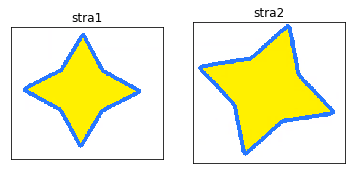

0.0
0.0007317225320584431


In [12]:
def max_cnt(contours):
    max_area = 0
    num = 0
    for i in range(len(contours)):
        area_i = cv2.contourArea(contours[i])
        if int(area_i)>int(max_area):
            max_area = area_i
            num = i
    return num
star1 = cv2.imread('star1.png',1)
star2 = cv2.imread('star2.png',1)
star1gray = cv2.cvtColor(star1,cv2.COLOR_BGR2GRAY)
star2gray = cv2.cvtColor(star2,cv2.COLOR_BGR2GRAY)
ret1,thresh1 = cv2.threshold(star1gray,240,250,0)
ret2,thresh2 = cv2.threshold(star2gray,240,250,0)

contours1,hierarchy1 = cv2.findContours(thresh1,1,2)
contours2,hierarchy2 = cv2.findContours(thresh2,1,2)
cnt1 = contours1[0]
cnt2 = contours2[0]
star1_draw = cv2.drawContours(star1,[cnt1],0,(255,120,40),5)
star2_draw = cv2.drawContours(star2,[cnt2],0,(255,120,40),5)
plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(star1_draw,cv2.COLOR_BGR2RGB),cmap='gray')
plt.title('stra1'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(star2_draw,cv2.COLOR_BGR2RGB),cmap='gray')
plt.title('stra2'),plt.xticks([]),plt.yticks([])
plt.show()
retval1 = cv2.matchShapes(cnt1,cnt1,1,0.0)
retval2 = cv2.matchShapes(cnt1,cnt2,1,0.0)
print(retval1)
print(retval2)

旋转前后边界的误差很小

### 17.2.2 轮廓面积(/质量)
当p=0,q=0时：  
$$M_{00}$$计算的就是输入图像的非零元素的个数，对于二值图像，也就是图像的面积或质量(Area)
轮廓的面积可以使用函数 cv2.contourArea() 计算得到，也可以使用矩（0阶矩）， M['m00']

In [13]:
area = cv2.contourArea(cnt)
area

19944.0

### 17.2.3 轮廓周长
也被称为弧长。可以使用函数 cv2.arcLength() 计算得到。这个函数的第二参数可以用来指定对象的形状是闭合的（ True），还是打开的（一条曲线）。


In [14]:
perimeter = cv2.arcLength(cnt,True)
perimeter

718.8427070379257

### 等效直径(Equivalent Diameter)
可以用等效直径来衡量轮廓的特征值，该值是与轮廓面积相等的圆形的直径

In [15]:
area = cv2.contourArea(cnt)
equivalent_diameter = np.sqrt(4*area/np.pi)
equivalent_diameter

159.35334787885094

### 17.2.4 轮廓近似（多边形拟合）
将轮廓形状近似到另外一种由更少点组成的轮廓形状，新轮廓的点的数目由我们设定的准确度来决定。使用的[Douglas-Peucker](https://blog.csdn.net/foreverling/article/details/78066632)算法，你可以到维基百科获得更多此算法的细节。  
为了帮助理解，假设我们要在一幅图像中查找一个矩形，但是由于图像的种种原因，我们不能得到一个完美的矩形，而是一个“坏形状”（如下图所示）。
![](contour_approx.png)


**函数：**approxCurve = cv2.approxPolyDP(curve,epsilon,closed[,approxCurve])
- curve：2D向量点
- epsilon：精度，从原始轮廓到近似轮廓的最大距离，经常设置为多边形总长度的百分比形式
- approxCurve：轮廓近似
- closed：曲线是否闭合  
选择一个好的 epsilon 对于得到满意结果非常重要，现在你就可以使用这个函数来近似这个形状了。

### <font color=red>Douglas-Peucker算法</font>（该算法名字够吓人，其实思想很简单）  
在数字化时，要对曲线进行采样，即在曲线上取有限个点，将其变为折线，并且能够在一定程度上保持原有的形状。  

经典的Douglas-Peucker算法步骤如下：  

（1）在曲线首尾两点A，B之间连接一条直线AB，该直线为曲线的弦  
（2）得到曲线上离该直线段距离最大的点C，计算其与AB的距离d  
（3）比较该距离与预先给定的阈值epsilon的大小，如果小于epsilon，则该直线段作为曲线的近似，该段曲线处理完毕.  
（4）如果距离大于阈值，则用C将曲线分为两段AC和BC，连接AC,BC，构成一个三角形，再分别对两段取信进行1~3的迭代处理，将新找到的距离多边形距离最远的点加入到结果（分割点集合）中。  
（5）当轮廓上所有的点到多边形曲线的距离都低于阈值epsilon时停止迭代，依次连接各个分割点形成的折线，即可以作为曲线的近似。

In [16]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approxCurve = cv2.approxPolyDP(cnt,epsilon,True)

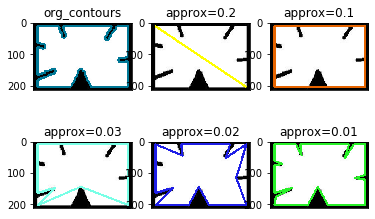

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import pylab

# 读取灰度图像
img = cv2.imread('contour_approx.png',1)
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 灰度图像转化为二值图像，自己设置合适的阈值
ret,thresh = cv2.threshold(imgGray,180,255,0)

# 获取轮廓
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]

epsilon1 = 0.2*cv2.arcLength(cnt,True)
approx1 = cv2.approxPolyDP(cnt,epsilon1,True)
epsilon2 = 0.1*cv2.arcLength(cnt,True)
approx2 = cv2.approxPolyDP(cnt,epsilon2,True)
epsilon3 = 0.03*cv2.arcLength(cnt,True)
approx3 = cv2.approxPolyDP(cnt,epsilon3,True)
epsilon4 = 0.02*cv2.arcLength(cnt,True)
approx4 = cv2.approxPolyDP(cnt,epsilon4,True)
epsilon5 = 0.01*cv2.arcLength(cnt,True)
approx5 = cv2.approxPolyDP(cnt,epsilon5,True)

img_org = img.copy()
org_contours = cv2.drawContours(img_org,[cnt],-1,(150,120,0),5)
img_1 = img.copy()
approx_1 = cv2.drawContours(img_1,[approx1],-1,(0,255,255),5)
img_2 = img.copy()
approx_2 = cv2.drawContours(img_2,[approx2],-1,(0,100,230),5)
img_3 = img.copy()
approx_3 = cv2.drawContours(img_3,[approx3],-1,(230,255,120),5)
img_4 = img.copy()
approx_4 = cv2.drawContours(img_4,[approx4],0,(230,30,30),5)
img_5 = img.copy()
approx_5 = cv2.drawContours(img_5,[approx5],0,(40,240,40),5)

plt.subplot(2,3,1),plt.imshow(cv2.cvtColor(org_contours,cv2.COLOR_BGR2RGB))
plt.title("org_contours"),plt.xticks([]),plt.xticks([])
plt.subplot(2,3,2),plt.imshow(cv2.cvtColor(approx_1,cv2.COLOR_BGR2RGB))
plt.title("approx=0.2"),plt.xticks([]),plt.xticks([])
plt.subplot(2,3,3),plt.imshow(cv2.cvtColor(approx_2,cv2.COLOR_BGR2RGB))
plt.title("approx=0.1"),plt.xticks([]),plt.xticks([])
plt.subplot(2,3,4),plt.imshow(cv2.cvtColor(approx_3,cv2.COLOR_BGR2RGB))
plt.title("approx=0.03"),plt.xticks([]),plt.xticks([])
plt.subplot(2,3,5),plt.imshow(cv2.cvtColor(approx_4,cv2.COLOR_BGR2RGB))
plt.title("approx=0.02"),plt.xticks([]),plt.xticks([])
plt.subplot(2,3,6),plt.imshow(cv2.cvtColor(approx_5,cv2.COLOR_BGR2RGB))
plt.title("approx=0.01"),plt.xticks([]),plt.xticks([])
plt.show()

### 17.2.5 凸包
凸包与轮廓近似相似，但不同，虽然有些情况下它们给出的结果是一样的。
函数 cv2.convexHull() 可以用来检测一个曲线是否具有凸性缺陷，并能纠
正缺陷。一般来说，凸性曲线总是凸出来的，至少是平的。如果有地方凹进去
了就被叫做凸性缺陷。例如下图中的手。红色曲线显示了手的凸包，凸性缺陷
被双箭头标出来了。 
![](hull.png)
函数hull = cv2.convexHull(points[, hull[, clockwise[, returnPoints]]  
参数：  
- points 我们要传入的轮廓
- hull 输出，通常不需要
- clockwise 方向标志。如果设置为 True，输出的凸包是顺时针方向的。否则为逆时针方向。
- returnPoints 默认值为 True,它会返回凸包上点的坐标。如果设置为 False，就会返回与凸包点对应的轮廓上的点。  

<font color=blue>凸包的特点是，凸包内任意连接两点都在凸包的内部  
    凸包与原轮廓之间的差在做手势识别时有重要的作用</font>  
    
要获得上图的凸包，下面的命令就够了：

In [18]:
hull = cv2.convexHull(cnt)

效果演示：

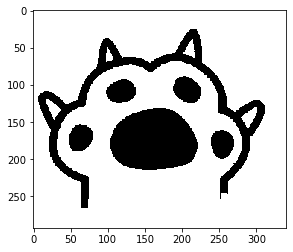

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('claws.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,230,255,0) # 二值化处理，阈值设置的很高

imageRGB = cv2.cvtColor(thresh,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

找到轮廓并画出来：

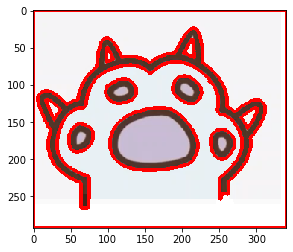

In [20]:
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img1 = img.copy()
img_centroid = cv2.drawContours(img1,contours,-1,(0,0,255),3)
imageRGB = cv2.cvtColor(img_centroid,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

选择其中一条合适的轮廓：


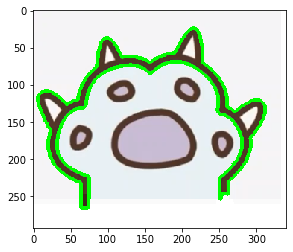

In [21]:
cnt = contours[8]
img2 = img.copy()
img_centroid = cv2.drawContours(img2,[cnt],-1,(0,255,0),3)
imageRGB = cv2.cvtColor(img_centroid,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

### 找到该轮廓的凸包图：


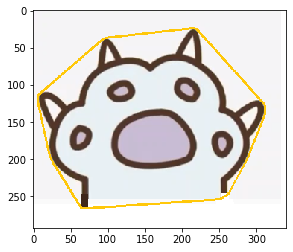

In [22]:
hull = cv2.convexHull(cnt)
img3 = img.copy()
img_centroid = cv2.drawContours(img3,[hull],-1,(10,200,255),2)
imageRGB = cv2.cvtColor(img_centroid,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

In [23]:
hull = cv2.convexHull(cnt,returnPoints=True)# returnPoints置为True 查找凸包
print(hull)

hull = cv2.convexHull(cnt,returnPoints=False)# returnPoints置为False 得到轮廓点的索引
print(hull)

print(cnt[75]) # 通过索引找到凸包

[[[311 139]]

 [[309 145]]

 [[287 200]]

 [[285 204]]

 [[262 246]]

 [[261 247]]

 [[251 254]]

 [[ 73 266]]

 [[ 65 266]]

 [[ 64 265]]

 [[ 26 204]]

 [[ 22 196]]

 [[ 20 187]]

 [[  7 127]]

 [[  6 122]]

 [[  6 116]]

 [[  7 114]]

 [[ 11 110]]

 [[ 94  38]]

 [[ 96  37]]

 [[213  24]]

 [[217  24]]

 [[219  25]]

 [[220  26]]

 [[310 126]]

 [[311 128]]]
[[ 75]
 [ 79]
 [113]
 [117]
 [132]
 [133]
 [139]
 [392]
 [393]
 [394]
 [422]
 [428]
 [432]
 [467]
 [469]
 [470]
 [472]
 [473]
 [552]
 [554]
 [  1]
 [  2]
 [  4]
 [  5]
 [ 72]
 [ 74]]
[[311 139]]


但是如果你想获得凸性缺陷，需要把 returnPoints 设置为 False。以
上面的矩形为例，首先我们找到他的轮廓 cnt。现在我把 returnPoints 设置
为 True 查找凸包，我得到下列值:(上述输出结果) 

现在把 returnPoints 设置为 False，我得到的结果是（上述输出结果）  
他们是轮廓点的索引。例如： cnt[75] = [[311 139]]，这与前面我们得到结果的第一个值是一样的。  

在凸检验中你我们还会遇到这些。

### 17.2.6 凸性检测（Checking Convexity）
函数 cv2.isContourConvex() 可以可以用来检测一个曲线是不是凸的（对于图形边界任意两点，做一条连线，看这条线是否在图形内部。凸性的大小为在内部的连线与总连线之比。）。它只能返回 True 或 False。没什么大不了的。

In [24]:
k = cv2.isContourConvex(hull) ## 凸包内的任意两点之间的连线都在轮廓内部
k

error: OpenCV(4.1.2) D:\Build\OpenCV\opencv-4.1.2\modules\imgproc\src\convhull.cpp:392: error: (-215:Assertion failed) total >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::isContourConvex'


In [26]:
k = cv2.isContourConvex(cnt) ## cnt绿色的轮廓
k

False

Solidity  <font color=red>有什么用呢?</font>  
Solidity时轮廓面积与凸包面积之比

In [27]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
solidity

0.19131166471225372

### 17.2.7 边界矩形/矩形包围框拟合(Straight Bounding Rectangle)
有两类边界矩形。  

<font color=blue>**一、直边界矩形**:</font> 一个直矩形（就是没有旋转的矩形）。它不会考虑对象是否旋转。所以边界矩形的面积不是最小的。可以使用函数 cv2.boundingRect() 查找得到。  
<font color=blur>**（x,y）为矩形左上角的坐标，（w,h）是矩形的宽和高。**</font>   
x,y,w,h = cv2.boundingRect(cnt)  
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)  



6 24 306 243


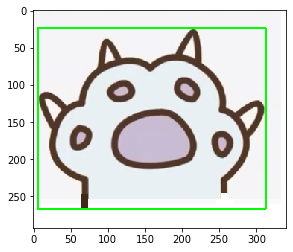

In [28]:
x,y,w,h = cv2.boundingRect(cnt)
print(x,y,w,h)
img4 = img.copy()
img_brect = cv2.rectangle(img4,(x,y),(x+w,y+h),(0,255,0),2)
imageRGB = cv2.cvtColor(img_brect,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

宽高比（Aspect Ratio）
它是对象的边界矩形的宽高比

In [29]:
aspect_ratio = float(w)/h
aspect_ratio

1.2592592592592593

Extent:轮廓面积与边界面积的比值

In [30]:
area =cv2.contourArea(cnt)
rect_area =w*h
extent = float(area)/rect_area
extent

0.14371015896070363

<font color=blue>**二、旋转的边界矩形**:</font> 这个边界矩形是面积最小的，因为它考虑了对象的旋转。  
用到的函数为 retval = cv2.minAreaRect(point)。  
- 返回值retval是一个 Box2D 结构，其中包含矩形左上角点的坐标（x,y），矩形的宽和高（w,h），以及旋转角度。但是要绘制这个矩形需要矩形的 4 个角点，可以通过函数 cv2.boxPoints() 获得。
- point:轮廓  

也即**旋转包围边框拟合(Rotated Rectangle)**:绘制轮廓的最小包围矩形

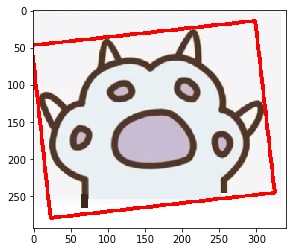

In [31]:
retval = cv2.minAreaRect(cnt)
box = cv2.boxPoints(retval) #将retval转换为能用的点的坐标
box = np.int0(box) # 将坐标数据转换为整型的数据
img5 = img.copy()
img_rorect = cv2.drawContours(img5,[box],0,(0,0,255),4)
imageRGB = cv2.cvtColor(img_rorect,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

### 17.2.8 最小外接圆（圆形包围边框拟合Minimum Enclosing Circle）
函数 center,radius = cv2.minEnclosingCircle(points) 通过迭代算法可以帮我们找到一个对象的外切圆。它是所有能够包括对象的圆中面积最小的一个。
- center:返回值，圆形的中心
- radius:返回值，半径
- points:参数，轮廓

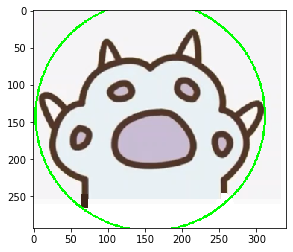

In [32]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img6 = img.copy()
img_circle = cv2.circle(img6,center,radius,(0,255,0),2)
imageRGB = cv2.cvtColor(img_circle,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

### 17.2.9 最优拟合椭圆（Fitting an Ellipse）
retval = cv2.fitEllipse(points)  
- retval:返回值是RotatedRect类型的值，因为实际上，该函数返回的是拟合椭圆的外接矩形，retval包含外接矩形的质心、宽、高、旋转角度等参数信息，这些信息正好与椭圆的中心点、轴长度、旋转角度等信息吻合
- points：轮廓

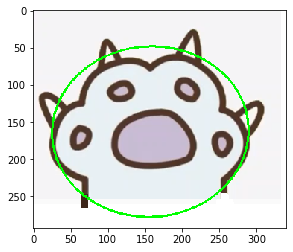

In [33]:
img = cv2.imread('claws.png')
ellipse = cv2.fitEllipse(cnt)
img8 = img.copy()
im_elps = cv2.ellipse(img8,ellipse,(0,255,0),2)
imageRGB = cv2.cvtColor(im_elps,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

#### 方向（Orientation）
有了最优拟合椭圆，返回椭圆中心、轴长、旋转角度等信息，使用这种方式，能够更直观的获取椭圆方向等信息

In [34]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
(x,y), (MA,ma), angle 
# 中心点 # 轴长度  # 旋转角度


((157.019287109375, 163.00909423828125),
 (229.1970977783203, 263.86981201171875),
 86.93006134033203)

### 17.2.10 最优直线拟合（Fitting a Line）
我们可以根据一组点拟合出一条直线，同样我们也可以为图像中的白色点拟合出一条直线。  
line = cv2.fitLine(points,distType,param,reps,aeps[,line])  
- points:轮廓
- line:输出参数。2D拟合，返回4个参数(vx,vy,x0,y0),其中(vx,vy)是直线归一化向量，(x0,y0)是直线上的一个点；3D拟合发牛6个参数(vx,vy,vz,x0,y0,z0),其中(vx,vy,vz)是表示方向的向量，(x0,y0,z0)是直线上的一个点
- distType:最小距离的计算方法类型。拟合直线时，要使得输入点到拟合直线的距离之和最小
- param与distType有关，设置为0时，函数会自动选择最优值
- reps:用于表示拟合直线所需要的径向量精度，通常设定为0.01
- aeps:用于表示拟合直线所需要的角度精度,通常设定为0.01


[0.9996947] [-0.02470924] [151.76546] [127.82092]


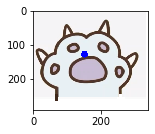

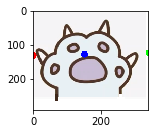

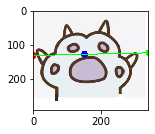

In [35]:
rows,cols = img.shape[:2]  
# img.shape[:2]取彩色图片的高、宽，如果img.shape[:3] 取彩色图片的高、宽、通道
#cv2.fitLine(points, distType, param, reps, aeps[, line ]) → line
#points – Input vector of 2D or 3D points, stored in std::vector<> or Mat.
#line – Output line parameters. In case of 2D fitting, it should be a vector of
#4 elements (likeVec4f) - (vx, vy, x0, y0), where (vx, vy) is a normalized
#vector collinear to the line and (x0, y0) is a point on the line. In case of
#3D fitting, it should be a vector of 6 elements (like Vec6f) - (vx, vy, vz,
#x0, y0, z0), where (vx, vy, vz) is a normalized vector collinear to the line
#and (x0, y0, z0) is a point on the line.
#distType – Distance used by the M-estimator
#distType=CV_DIST_L2
#ρ(r) = r2 /2 (the simplest and the fastest least-squares method)
#param – Numerical parameter ( C ) for some types of distances. If it is 0, an optimal value
#is chosen.
#reps – Sufficient accuracy for the radius (distance between the coordinate origin and the
#line).
#aeps – Sufficient accuracy for the angle. 0.01 would be a good default value for reps and
#aeps.
img9 = img.copy()
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
print(vx,vy,x,y)
img_point0 = cv2.circle(img9,(int(x),int(y)),10,(255,0,0),-1)
plt.subplot(2,2,1),plt.imshow(cv2.cvtColor(img_point0,cv2.COLOR_BGR2RGB))
plt.show()

lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)

img_point1 = cv2.circle(img_point0,(cols-1,righty),10,(0,255,0),-1)
img_point2 = cv2.circle(img_point1,(0,lefty),10,(0,0,255),-1)
plt.subplot(2,2,1),plt.imshow(cv2.cvtColor(img_point2,cv2.COLOR_BGR2RGB))
plt.show()

img_line = cv2.line(img_point2,(cols-1,righty),(0,lefty),(0,255,0),2)
plt.subplot(2,2,1),plt.imshow(cv2.cvtColor(img_line,cv2.COLOR_BGR2RGB))

plt.show()

两个端点的坐标计算![](calculation.jpg)

## 17.3 轮廓的性质
本小节我们将要学习提取一些经常使用的对象特征。你可以在[Matlab
regionprops documentation](http://www.mathworks.in/help/images/ref/regionprops.html) 更多的图像特征。

### 17.3.1 长宽比
边界矩形的宽高比$$AspectRation = \frac{Width}{Height}$$

In [36]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h
aspect_ratio

1.2592592592592593

### 17.3.2 Extent
轮廓面积与边界矩形面积的比。
$$Extent = \frac{ObjectArea}{BoundingRectangleArea}$$

In [37]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
extent

0.14371015896070363

### 17.3.3 Solidity
轮廓面积与凸包面积的比。
$$Solidity = \frac{ContourArea}
{ConvexHullArea}$$

In [38]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
solidity

0.19131166471225372

### 17.3.4 Equivalent Diameter
与轮廓面积相等的圆形的直径$$EquivalentDiameter = \sqrt{\frac{4 × ContourArea}{π}}$$

In [39]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
equi_diameter

116.64406446553528

### 17.3.5 方向
对象的方向，下面的方法还会返回长轴和短轴的长度

In [40]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

### 17.3.6 掩模和像素点(mask and pixel points)
之前我们讲过,cv2.drawContours()的轮廓宽度参数设置为-1，即可获得特定对象的实心轮廓，即掩模(mask)，另外，也可以获得轮廓像素点的具体位置信息，可以通过两种方式获得轮廓像素点的位置信息，一种是使用numpy函数，另外一种是使用OpenCV函数  



这里我们是用来两种方法，第一种方法使用了 Numpy 函数，第二种使用
了 OpenCV 函数。结果相同，但还是有点不同。 Numpy 给出的坐标是（ row，
colum）
形式的。而 OpenCV 给出的格式是（ x， y） 形式的。所以这两个结果基
本是可以互换的。 row=x， colunm=y。

**使用numpy函数获得像素点**

In [41]:
img = np.zeros((5,5),np.uint8)
img[1:4,1:4]=1
kernel = np.ones((3,1),np.uint8)
erosion = cv2.erode(img,kernel)
print('img\n',img)

img
 [[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]


In [42]:
np.nonzero(img)# 返回坐标

(array([1, 1, 1, 2, 2, 2, 3, 3, 3], dtype=int64),
 array([1, 2, 3, 1, 2, 3, 1, 2, 3], dtype=int64))

In [43]:
np.transpose(np.nonzero(img))# 处理为（x,y）的形式

array([[1, 1],
       [1, 2],
       [1, 3],
       [2, 1],
       [2, 2],
       [2, 3],
       [3, 1],
       [3, 2],
       [3, 3]], dtype=int64)

**使用OpenCV函数获得像素点**

cv2.findNonZero()给出的格式是（x,y） 形式的，即：(列，行)

In [44]:
cv2.findNonZero(img)

array([[[1, 1]],

       [[2, 1]],

       [[3, 1]],

       [[1, 2]],

       [[2, 2]],

       [[3, 2]],

       [[1, 3]],

       [[2, 3]],

       [[3, 3]]], dtype=int32)

应用于图像显示出来

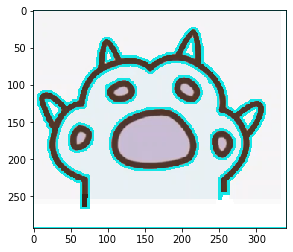

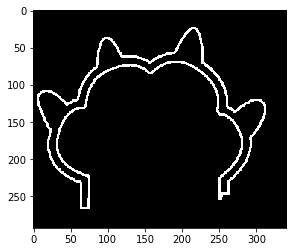

(4833, 2)


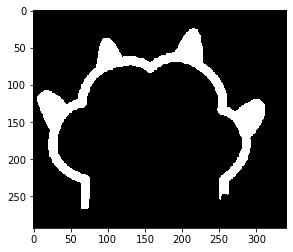

(11334, 1, 2)


In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('claws.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(imgray,230,255,0) # 二值化处理，阈值设置的很高

contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img_copy = img.copy()
all_contours = cv2.drawContours(img_copy,contours,-1,(230,230,20),2)

imageRGB =cv2.cvtColor(all_contours,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

# 找到最长的轮廓
num_cnt = 0
max_len = 0
for i in range(len(contours)):
    len_i = cv2.arcLength(contours[i],True)
    if len_i> max_len:
        max_len = len_i
        num_cnt = i
    else:
        pass
cnt = contours[num_cnt]

# 绘制空心轮廓
mask1 = np.zeros(imgray.shape,np.uint8)
cv2.drawContours(mask1,[cnt],0,255,2)  # 255是最大值，空心轮廓，最后的2表示绘制轮廓的粗细
imageRGB =cv2.cvtColor(mask1,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

# 使用 Numpy函数获得轮廓坐标点
pixelpoints = np.transpose(np.nonzero(mask1))
print(pixelpoints.shape) # 4833个2值的点

# 绘制实心轮廓
mask1 = np.zeros(imgray.shape,np.uint8)
cv2.drawContours(mask1,[cnt],0,255,-1)  # 255是最大值，-1表示实心轮廓，
imageRGB =cv2.cvtColor(mask1,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

# 使用 OpenCV函数获得轮廓坐标点
pixelpoints = cv2.findNonZero(mask1)
print(pixelpoints.shape) # 11334个2值的点

### 17.3.7 最大值和最小值及它们的位置
我们可以使用掩模图像得到这些参数。

In [51]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(imgray,mask = mask1)
print(min_val)# 最小值
print(max_val)# 最大值
print(min_loc)# 最小值位置
print(max_loc)# 最大值位置

44.0
255.0
(65, 247)
(253, 246)


### 17.3.8 平均颜色及平均灰度
我们也可以使用相同的掩模求一个对象的平均颜色或平均灰度

In [52]:
mean_val = cv2.mean(img,mask = mask1)
mean_val #三个通道B G R上的均值，最后一个位置是Alpha通道

(105.44009175930829, 116.31312863949181, 133.50873478030704, 0.0)

In [53]:
mean_val = cv2.mean(imgray,mask = mask1)
mean_val # 平均灰度

(120.22516322569261, 0.0, 0.0, 0.0)

### 17.3.9 极点（Extreme point）
一个对象最上面，最下面，最左边，最右边的点。

In [49]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])
##cnt是边界点集合
print(leftmost)
print(rightmost)
print(topmost)
print(bottommost)

(6, 122)
(311, 128)
(213, 24)
(73, 266)


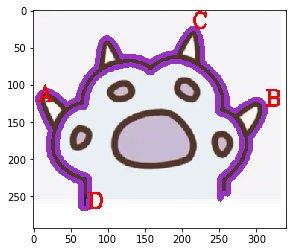

In [50]:
img10 = img.copy()
cv2.drawContours(img10,[cnt],0,(200,50,150),5)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img10,'A',leftmost,font,1,(0,0,255),2)
cv2.putText(img10,'B',rightmost,font,1,(0,0,255),2)
cv2.putText(img10,'C',topmost,font,1,(0,0,255),2)
cv2.putText(img10,'D',bottommost,font,1,(0,0,255),2)

imageRGB = cv2.cvtColor(img10,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()